# EDA for orCaScore Dataset

1. Data
    - Study involved images acquired on four CT scanners from four vendors in four hospitals.
    - Standard parameters for calcium scoring in cardiac CT were used.
    - Each patient provided both non-contrast enhanced CT and contrast-enhanced CTA images.
    - Training set comprised images of 32 patients.
    - Test set comprised images of 40 patients.

2. Reference standard
    - Reference standard for non-contrast enhanced CT images set independently by two experts using a custom-built tool.
    - Intensities greater than 130 HU highlighted following commercial vendors' protocol.
    - Individual lesions identified in 3-D using 6-connectivity.
    - Calcifications manually labeled as belonging to LAD, LCX, or RCA.
    - Calcifications in left main coronary artery labeled as LAD calcifications.
    - Calcifications labeled as 1 (LAD), 2 (LCX), or 3 (RCA) in reference annotations.
    - Disagreements between experts resolved through consensus for reference standard.

3. References:
    - https://orcascore.grand-challenge.org/

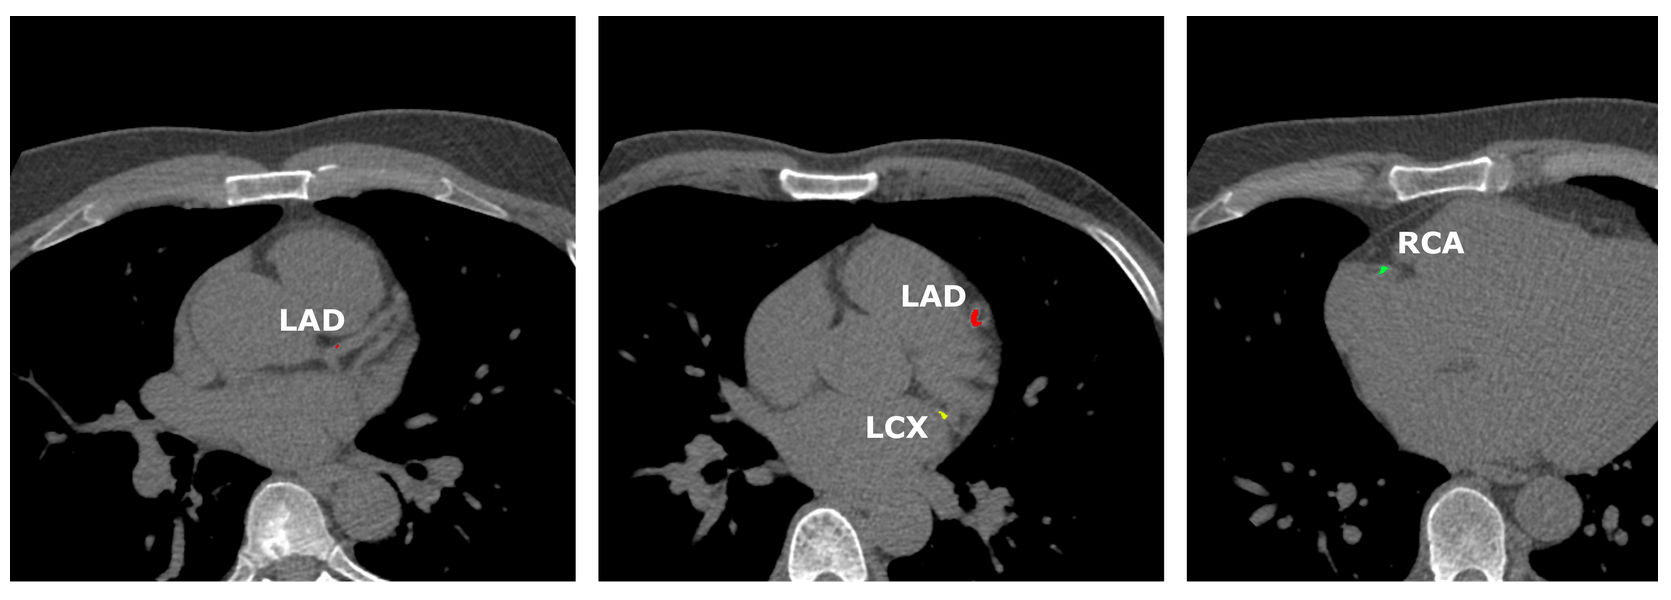

In [1]:
from glob import glob
from pathlib import Path

import nibabel as nib
import pandas as pd
import plotly.graph_objects as go

In [2]:
orCaScore_images_path = Path("../data/Images/nifti")
orCaScore_masks_path = Path("../data/Plaques")

In [3]:
data_dict = {
    "images": sorted(glob(str(orCaScore_images_path / "*.nii.gz"))),
    "masks": sorted(glob(str(orCaScore_masks_path / "*.nii.gz"))),
}

In [4]:
df_data = pd.DataFrame(data_dict)


In [5]:
df_data['image_spacing'] = df_data['images'].apply(lambda x: nib.load(x).header.get_zooms())
df_data['mask_spacing'] = df_data['masks'].apply(lambda x: nib.load(x).header.get_zooms())
df_data['image_size'] = df_data['images'].apply(lambda x: nib.load(x).header.get_data_shape())
df_data['mask_size'] = df_data['masks'].apply(lambda x: nib.load(x).header.get_data_shape())

### Check spacings

In [6]:
image_spacing_df = pd.DataFrame(df_data['image_spacing'].to_list(), columns=['x', 'y', 'z'])
image_spacing_df['voxel_volume'] = image_spacing_df['x'] * image_spacing_df['y'] * image_spacing_df['z']

In [7]:
mask_spacing_df = pd.DataFrame(df_data['mask_spacing'].to_list(), columns=['x', 'y', 'z'])
mask_spacing_df['voxel_volume'] = mask_spacing_df['x'] * mask_spacing_df['y'] * mask_spacing_df['z']

In [8]:
trace1 = go.Scatter3d(
    x=image_spacing_df['x'],
    y=image_spacing_df['y'],
    z=image_spacing_df['z'],
    mode='markers',
    marker={
        "size": 12,
        "color": 'rgb(255, 0, 0)',
        "opacity": 0.8
    },
    name='Image Spacing'
)
trace2 = go.Scatter3d(
    x=mask_spacing_df['x'],
    y=mask_spacing_df['y'],
    z=mask_spacing_df['z'],
    mode='markers',
    marker={
        "size": 12,
        "color": 'rgb(0, 0, 255)',
        "opacity": 0.8
    },
    name='Mask Spacing'
)

layout = go.Layout(
    scene={
        "aspectmode": 'cube',
        "xaxis": {
            "title": 'X',
            "backgroundcolor": "rgb(200, 200, 230)",
            "gridcolor": "rgb(255, 255, 255)",
            "showbackground": True,
            "zerolinecolor": "rgb(255, 255, 255)",
        },
        "yaxis": {
            "title": 'Y',
            "backgroundcolor": "rgb(230, 200,230)",
            "gridcolor": "rgb(255, 255, 255)",
            "showbackground": True,
            "zerolinecolor": "rgb(255, 255, 255)",
        },
        "zaxis": {
            "title": 'Z',
            "backgroundcolor": "rgb(230, 230,200)",
            "gridcolor": "rgb(255, 255, 255)",
            "showbackground": True,
            "zerolinecolor": "rgb(255, 255, 255)",
        }
    },
    title='Image and Mask Spacing',
    font={"family": 'Balto'},
    showlegend=True,
    legend={
        "x": 0.85,
        "y": 0.9
    }
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


In [9]:
image_spacing_df.describe()

In [10]:
mask_spacing_df.describe()

### Check size of images and masks